In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


df=pd.read_csv(r"C:\Users\Administrator\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)



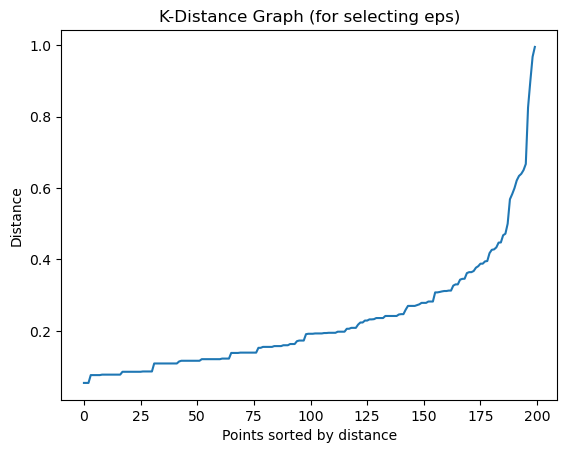

In [5]:
nn=NearestNeighbors(n_neighbors=5)
nn_fit=nn.fit(X_scaled)

distances,indices=nn_fit.kneighbors(X_scaled)

k_distances=np.sort(distances[:,4-1])
plt.plot(k_distances)
plt.title("K-Distance Graph (for selecting eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance")
plt.show()

In [6]:
db=DBSCAN(eps=0.3,min_samples=5)

labels=db.fit_predict(X_scaled)

df["Cluster"] = labels
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


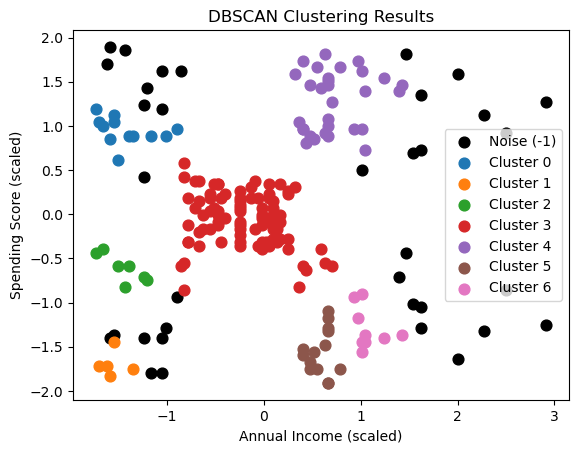

In [ ]:
unique_label = np.unique(labels)

for cluster in unique_label:
    cluster_points = X_scaled[labels == cluster]
    
    if cluster == -1:
       
        plt.scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            s=60,
            c="black",
            label="Noise (-1)"
        )
    else:
        plt.scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            s=60,
            label=f"Cluster {cluster}"
        )

plt.title("DBSCAN Clustering Results")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()